In [19]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# 檔案路徑列表
file_paths = {
    "30mT": "./Data/CH467160_DiffTurns_DC_30mT.csv",
    "20mT": "./Data/CH467160_DiffTurns_DC_20mT.csv",
    "40mT": "./Data/CH467160_DiffTurns_DC_40mT.csv"
}

# 為不同磁通密度分配顏色
colors = {"30mT": "tab:blue", "20mT": "tab:orange", "40mT": "tab:green"}

# 初始化字典存放數據
data = {}

# 讀取所有檔案
for key, path in file_paths.items():
    df = pd.read_csv(path)

    # 設定欄位名稱
    columns = ["Hdc_N20", "Pcv_N20", "Hdc_N10", "Pcv_N10"]
    df_cleaned = df.iloc[1:].reset_index(drop=True)  # 移除第一行標題
    df_cleaned.columns = columns  # 重新命名欄位
    df_cleaned = df_cleaned.astype(float)  # 轉換數據類型

    data[key] = df_cleaned


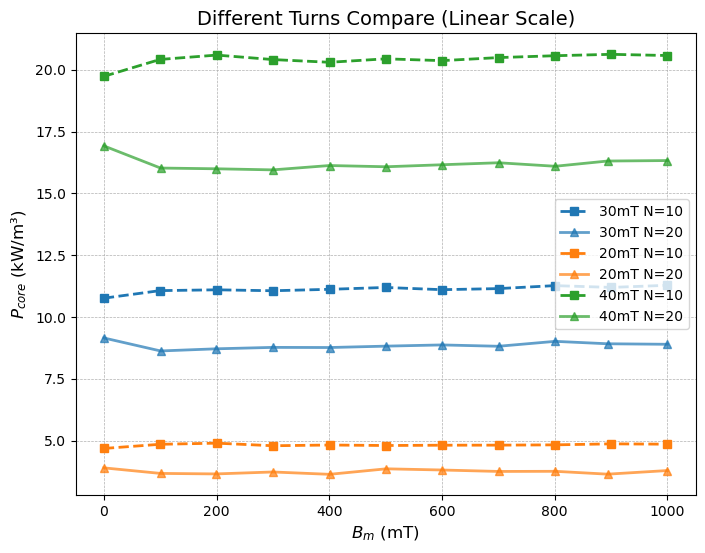

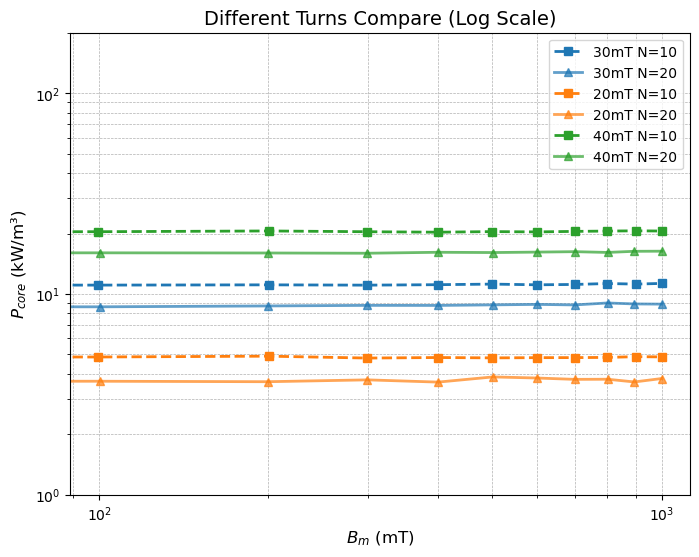

In [ ]:
# ======= 線性尺度圖 =======
plt.figure(figsize=(8, 6))

for key, df_cleaned in data.items():
    color = colors[key]
    plt.plot(df_cleaned["Hdc_N10"],
             df_cleaned["Pcv_N10"],
             's--',
             color=color,
             label=f"{key} N=10",
             linewidth=2,
             markersize=6)
    plt.plot(df_cleaned["Hdc_N20"],
             df_cleaned["Pcv_N20"],
             '^-',
             color=color,
             label=f"{key} N=20",
             linewidth=2,
             markersize=6,
             alpha=0.7)

# 標籤與標題
plt.xlabel(r"$B_{m}$ (mT)", fontsize=12)
plt.ylabel(r"$P_{core}$ (kW/m³)", fontsize=12)
plt.title("Different Turns Compare (Linear Scale)", fontsize=14)
plt.legend(fontsize=10)
plt.grid(which="both", linestyle="--", linewidth=0.5)

# 顯示圖表
plt.show()

# ======= 對數尺度圖 =======
plt.figure(figsize=(8, 6))

for key, df_cleaned in data.items():
    color = colors[key]
    plt.plot(df_cleaned["Hdc_N10"],
             df_cleaned["Pcv_N10"],
             's--',
             color=color,
             label=f"{key} N=10",
             linewidth=2,
             markersize=6)
    plt.plot(df_cleaned["Hdc_N20"],
             df_cleaned["Pcv_N20"],
             '^-',
             color=color,
             label=f"{key} N=20",
             linewidth=2,
             markersize=6,
             alpha=0.7)

# 設定對數尺度
plt.xscale("log")
plt.yscale("log")

# 軸範圍調整
plt.ylim(1, 200)

# 標籤與標題
plt.xlabel(r"$B_{m}$ (mT)", fontsize=12)
plt.ylabel(r"$P_{core}$ (kW/m³)", fontsize=12)
plt.title("Different Turns Compare (Log Scale)", fontsize=14)
plt.legend(fontsize=10)
plt.grid(which="both", linestyle="--", linewidth=0.5)

# 顯示圖表
plt.show()